In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Define the funcion from whcih we want to sample
def fun(x):
    return  7*np.sin(3*x) - 5*np.cos(2*x)

In [3]:
# Sampling the function at N discrete points
L = 2*np.pi
N = 6
h = L/N
xj = np.arange(N)*h
fj = fun(xj)

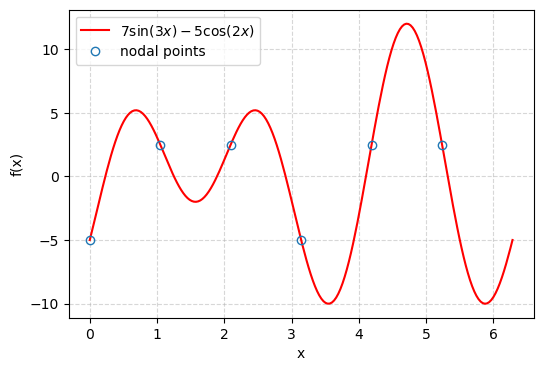

In [4]:
# Plot orginal function and the discrete sampling points
Np = 200
xf = np.linspace(0,L,Np)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(xf, fun(xf), label=r'$7\sin(3x)-5\cos(2x)$',color='r')
plt.plot(xj, fj, marker='o', linestyle='None', fillstyle='none', label=r'nodal points')

# Customize the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.5)
# Add a legend
plt.legend(loc='upper left')
# Show the plot
plt.show()

# Use numpy's FFT to find the Fourier transform vector 

Recall that the the vector of Fourier transform values is an approximation to the "exact" Fourier coeffcients

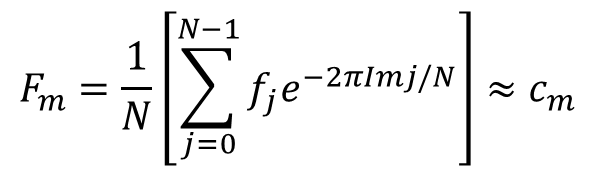



Then, the partial sum with the Fourier transform approximating the "exact" Fourier coeffcients for N is odd and M=(N-1)/2

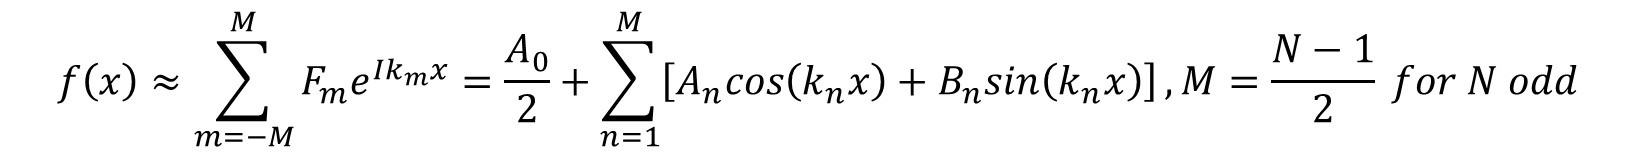

approximates the function with spectral accuracy!

Look at numpy's fft for details: https://numpy.org/doc/stable/reference/routines.fft.html

In [5]:
F = np.fft.fft(fj)/N
print(F)

# # We can get the index vector m easily
# mv = fftshift(np.arange(0,N))
# kv = fftfreq(N)*N
# print(mv)
# print(kv)

[ 3.55271368e-15+0.00000000e+00j  2.10942375e-15+2.24345647e-15j
 -2.50000000e+00+4.48691293e-15j -5.55111512e-15+0.00000000e+00j
 -2.50000000e+00-4.48691293e-15j  2.10942375e-15-2.24345647e-15j]


The upper summation limit in the complex Fourier series is (expression correct for N odd or N even)

In [6]:
Mu = int(np.floor(N/2))
print(Mu)

3


The lower summation limit in the complex Fourier series is (expression correct for N odd or N even)

In [7]:
Ml = int(np.ceil(N/2) - 1)
print(Ml)

2


Create the partial sum: the complex Fourier series approximation evaluated at the Np points xf used for plotting

In [15]:
# Intialize the partial sum approximation at the Np points to zero
SM_c = np.zeros(Np)

# Loop from -Ml to Mu (careful, the rage function does not inlcude the endpoint)
for m in range(-Ml,Mu+1):
    # Wave number
    km = 2*np.pi*m/L
    #  get the right index k corresponding to m from the F vector => numpy array indexing starts at 0
    if (m<0):
        k = (N+m)
    else:
        k = m
    SM_c = SM_c + F[k] * np.exp(1j*km*xf)
    print("Approx. Fourier coefficient m=%i, km=%f: Fm=%7.4f %+7.4fi" % (m,km,np.real(F[k]),np.imag(F[k])))

Approx. Fourier coefficient m=-2, km=-2.000000: Fm=-2.5000 -0.0000i
Approx. Fourier coefficient m=-1, km=-1.000000: Fm= 0.0000 -0.0000i
Approx. Fourier coefficient m=0, km=0.000000: Fm= 0.0000 +0.0000i
Approx. Fourier coefficient m=1, km=1.000000: Fm= 0.0000 +0.0000i
Approx. Fourier coefficient m=2, km=2.000000: Fm=-2.5000 +0.0000i
Approx. Fourier coefficient m=3, km=3.000000: Fm=-0.0000 +0.0000i


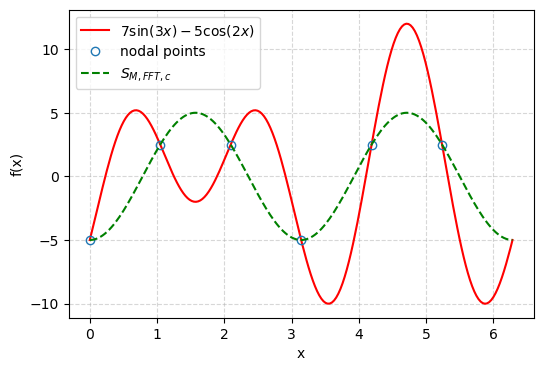

In [16]:
# Plot "complex" Fourier partial sum

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(xf, fun(xf), label=r'$7\sin(3x)-5\cos(2x)$',color='r')
plt.plot(xj, fj, marker='o', linestyle='None', fillstyle='none', label=r'nodal points')
plt.plot(xf, np.real(SM_c), linestyle='--', color='g',label=r'$S_{M,FFT,c}$')

# Customize the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.5)
# Add a legend
plt.legend(loc='upper left')
# Show the plot
plt.show()

Real valued partial sum approximation

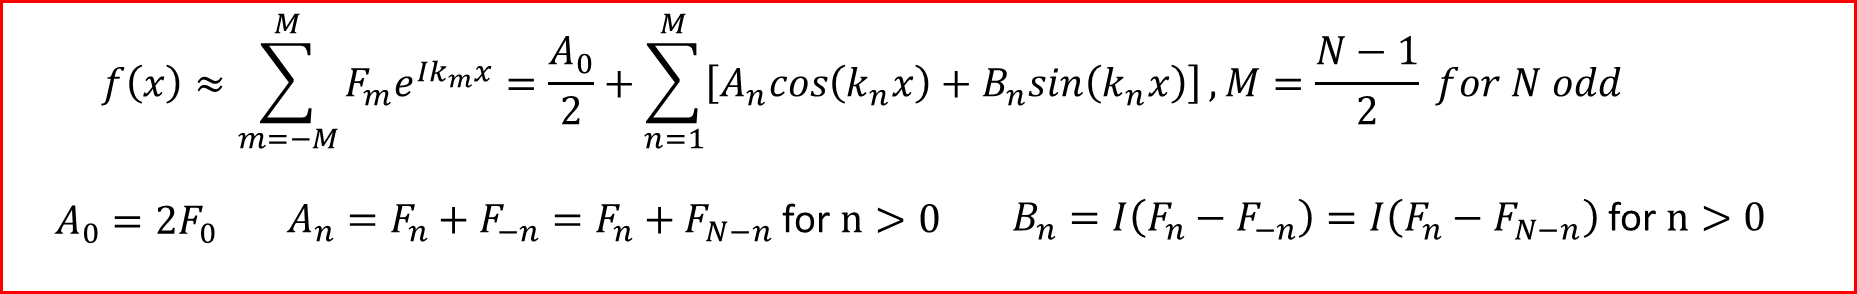

In [17]:
SM_r = np.ones(Np)
A0 = 2.*F[0]
SM_r = A0/2 * SM_r
for n in range(1,Ml+1):
    kn = 2*np.pi*n/L
    An = F[n] + F[N-n]
    Bn = 1j*(F[n] - F[N-n])
    SM_r += An * np.cos(kn*xf) + Bn * np.sin(kn*xf)
    # Print the approximate Fourier coeffcients to screen
    if (n==1):
        print("A0 = %7.4f" % (np.real(A0)))
        print("A%i = %7.4f, B%i = %7.4f" % (n,np.real(An),n,np.real(Bn)))
    else:
        print("A%i = %7.4f, B%i = %7.4f" % (n,np.real(An),n,np.real(Bn)))

A0 =  0.0000
A1 =  0.0000, B1 = -0.0000
A2 = -5.0000, B2 = -0.0000


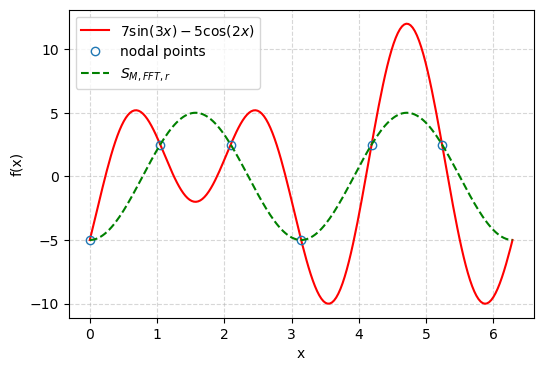

In [18]:
# Plot "real" Fourier partial sum

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(xf, fun(xf), label=r'$7\sin(3x)-5\cos(2x)$',color='r')
plt.plot(xj, fj, marker='o', linestyle='None', fillstyle='none', label=r'nodal points')
plt.plot(xf, np.real(SM_r), linestyle='--', color='g',label=r'$S_{M,FFT,r}$')

# Customize the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.5)
# Add a legend
plt.legend(loc='upper left')
# Show the plot
plt.show()

Computationally more efficient approach using numpy rfft (for real valued functions): https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html

rfft returns only the Fourier coeffcients corresponding to the non-negative wavenumbers. For real values, the Fourier coeffcients corresponding to the negative wavenumbers are the complex-conjugate of 
Fourier coeffcients corresponding to the non-negative wavenumbers

=> the rrft alorithm is twice as fast as fft!

In [12]:
Fr = np.fft.rfft(fj)/N
print(Fr)

[ 3.18263934e-15+0.00000000e+00j  1.92438658e-15+2.25090633e-15j
 -2.50000000e+00+4.55846155e-15j -5.55111512e-15+0.00000000e+00j]


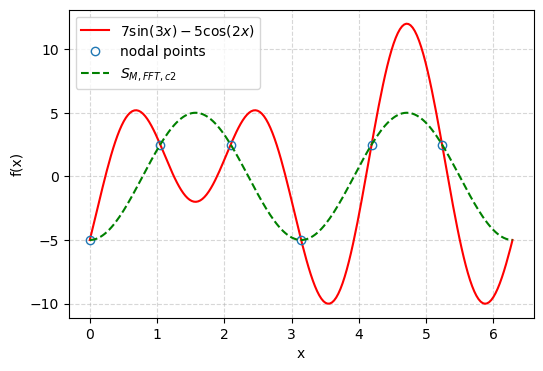

In [21]:
# Complex Fourier series approximation
SM_c2 = np.zeros(Np, dtype=np.complex64)
# Let's use fancy loops available in Python
for m, Fm in enumerate(Fr):
    # Sum from 0 to +M
    SM_c2 += Fm * np.exp(2j * np.pi * m * xf / L)
    # Sum from -M to -1
    if m != 0:
        SM_c2 += Fm.conjugate() * np.exp(-2j * np.pi * m * xf / L)

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(xf, fun(xf), label=r'$7\sin(3x)-5\cos(2x)$',color='r')
plt.plot(xj, fj, marker='o', linestyle='None', fillstyle='none', label=r'nodal points')
plt.plot(xf, np.real(SM_c2), linestyle='--', color='g',label=r'$S_{M,FFT,c2}$')

# Customize the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.5)
# Add a legend
plt.legend(loc='upper left')
# Show the plot
plt.show()

Similarly, we can generate the sin/cos real Fourier series approximation


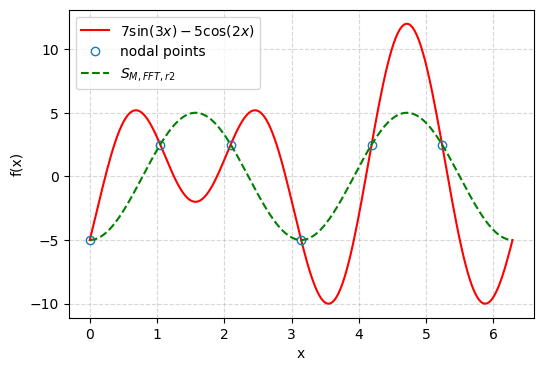

In [14]:
# Get the an and bn coeffcients if N is even
is_even = N % 2 == 0
if is_even:
    a0 = 2. *  Fr[0].real  
    a =  2. *  Fr[1:-1].real
    b =  2. * -Fr[1:-1].imag
# N is odd
else:
    a0 = 2. *  Fr[0].real
    a =  2. *  Fr[1::].real
    b =  2. * -Fr[1::].imag
    
    
SM_r2 = np.ones_like(xf) * a0 / 2.
for n, (an, bn) in enumerate(zip(a, b)):
        SM_r2 += an * np.cos(2 * np.pi * (n + 1) * xf / L) + bn * np.sin(
            2 * np.pi * (n + 1) * xf / L)
    
plt.figure(figsize=(6, 4))
plt.plot(xf, fun(xf), label=r'$7\sin(3x)-5\cos(2x)$',color='r')
plt.plot(xj, fj, marker='o', linestyle='None', fillstyle='none', label=r'nodal points')
plt.plot(xf, SM_r2, linestyle='--', color='g',label=r'$S_{M,FFT,r2}$')

# Customize the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.5)
# Add a legend
plt.legend(loc='upper left')
# Show the plot
plt.show()